In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
# Load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to (0, 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape to add a channel dimension (28x28x1 for grayscale images)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [5]:
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps before fully connected layers
model.add(layers.Flatten())

# Dense (fully connected) layer
model.add(layers.Dense(128, activation='relu'))

# Output layer (10 classes)
model.add(layers.Dense(10, activation='softmax'))


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7714 - loss: 0.6416 - val_accuracy: 0.8793 - val_loss: 0.3375
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8816 - loss: 0.3255 - val_accuracy: 0.8926 - val_loss: 0.2917
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9043 - loss: 0.2587 - val_accuracy: 0.8982 - val_loss: 0.2768
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9155 - loss: 0.2263 - val_accuracy: 0.9024 - val_loss: 0.2673
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9247 - loss: 0.2018 - val_accuracy: 0.9092 - val_loss: 0.2461
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9320 - loss: 0.1752 - val_accuracy: 0.9088 - val_loss: 0.2517
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9410 - loss: 0.1571 - val_accuracy: 0.9120 - val_loss: 0.2672
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9501 - loss: 0.1325 

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9038 - loss: 0.3204
Test accuracy: 0.9057999849319458


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


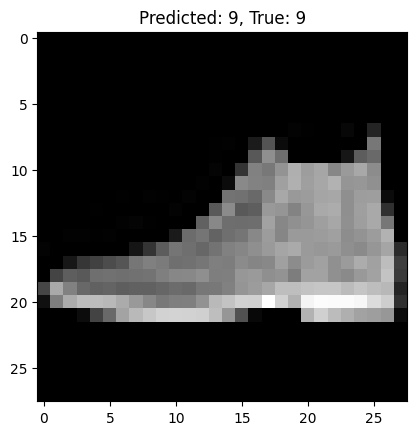

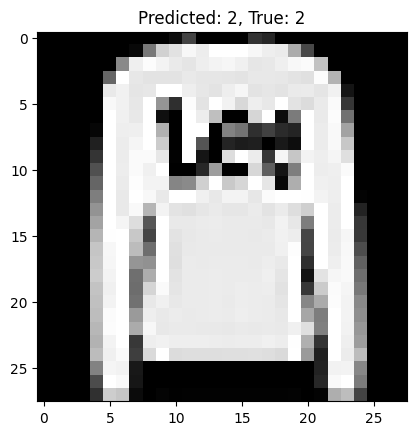

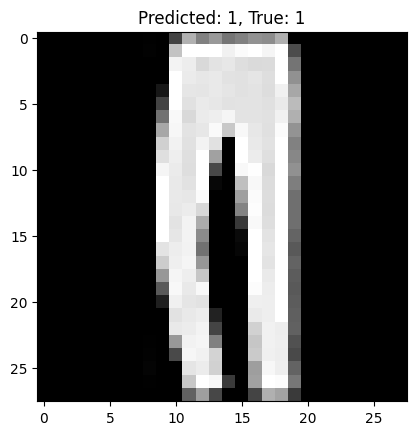

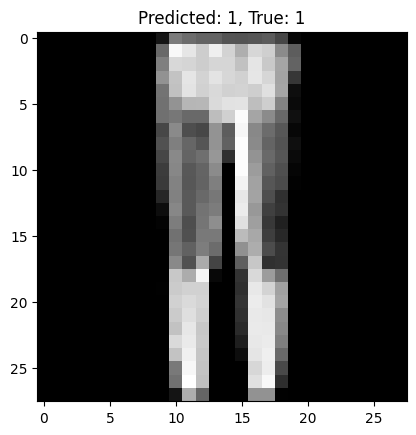

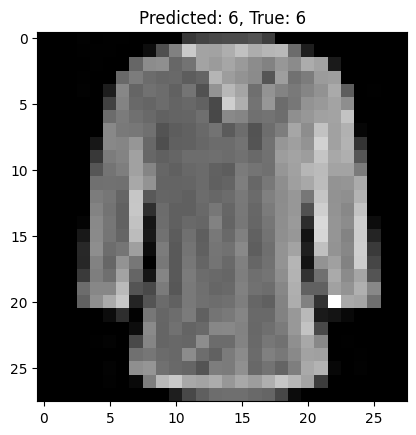

In [9]:
# Make predictions on test data
predictions = model.predict(X_test)

# Convert prediction probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded test labels back to class labels
true_classes = np.argmax(y_test, axis=1)

# Function to plot images and predictions
def plot_predictions(index):
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[index]}, True: {true_classes[index]}")
    plt.show()

# Show predictions for first 5 images
for i in range(5):
    plot_predictions(i)
